In [1]:
import module_cleaning as cl
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/opt/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Importation de la BDD

In [2]:
df = pd.read_csv('/Users/f.b/Desktop/Data_Science/Clock_industry/Scripts/Data/watches_database.csv')
liste_colonnes = ['marque','modele','mouvement']
df = cl.suppression(df,liste_colonnes)
df = df.iloc[:, 1:]

# Traitement des valeurs manquantes et mise en forme de la BDD

In [3]:
colonnes = ['matiere_boitier','matiere_bracelet','sexe','diametre',
            'etencheite','matiere_lunette','matiere_verre','boucle',
            'matiere_boucle','rouage','reserve_de_marche']

for col in colonnes:
    df = cl.remplissage(df, col)

In [4]:
df = cl.remplissage_mouvement(df, 'mouvement')
df = cl.remplissage_mat_verre (df, 'matiere_verre')
df = cl.remplissage_mat_verre(df, 'matiere_verre')
df = cl.remplissage_reserve_marche(df, 'reserve_de_marche')
df['Complications'] = df['fonctions'].apply(cl.count_functions)

In [5]:
colonnes_a_supp = ['rouage', 'fonctions','id']

liste_colonnes = ['etencheite','matiere_bracelet', 'etat', 'sexe', 'diametre', 'matiere_lunette',
                       'matiere_verre', 'boucle','reserve_de_marche' ]


colonne = 'matiere_boitier'

df = cl.suppression_lignes_vides_suite(df, liste_colonnes, colonnes_a_supp, colonne)

# Recodage et mise en forme des variables 

In [6]:
df = cl.traitement_marque(df,'marque')
df = cl.traitement_modele(df,'modele')
df = cl.traitement_mouvement(df, 'mouvement')
df = cl.traitement_matiere_bracelet(df,'matiere_bracelet')
df = cl.traitement_matiere_boitier(df,'matiere_boitier')
df = cl.traitement_annee_prod(df,'annee_prod')
df = cl.traitement_etat(df, 'etat')
df['prix'] = df['prix'].apply(cl.extraire_elements_avant_euro)
df = cl.traitement_prix(df, 'prix')
df['reserve_de_marche'] = df['reserve_de_marche'].apply(cl.extraire_elements_h)
df = cl.traitement_diametre(df, 'diametre')
df = cl.traitement_etencheite(df, 'etencheite')
df = cl.traitement_matiere_lunette(df, 'matiere_lunette')
df = cl.traitement_matiere_verre(df,'matiere_verre')
df = cl.traitement_matiere_boucle(df, 'matiere_boucle')
df = cl.traitement_boucle(df, 'boucle')
df = cl.traitement_ville(df, 'ville')
df = cl.traitement_complication_date(df,'Complications', 'Date_recup')
df = cl.traitement_sexe(df,'sexe')

/Users/f.b/Desktop/Data_Science/Clock_industry/scripts/cleaning_analysis/module_cleaning.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colonne] = df[colonne].astype('float')


# Analayses

In [7]:
df['prix_log'] = np.log(df['prix'])

## Etude de la colonne pays

In [12]:
effectif = df.pays.value_counts().reset_index()

def fig(df):
    
    effectif.columns = ['pays', 'nbre_montre']
    effectif['pourcentage'] = (effectif['nbre_montre'] / effectif['nbre_montre'].sum())*100
    effectif['pourcentage'] = effectif['pourcentage'].round(2)

    fig = px.choropleth(effectif, 
                        locations="pays",  # Nom de la colonne contenant les pays
                        locationmode="country names",  # Mode pour faire correspondre les noms des pays
                        color="nbre_montre",  # Colonne des effectifs
                        color_continuous_scale="Plasma",  # Palette de couleurs
                        hover_name="pays",
                        title="Provenance des offres")

    return fig.show()

In [13]:
fig(df)

In [14]:
def fig(df):
    fig = go.Figure(data=[go.Table(
        header=dict(values=["Pays", "Nombre de montre","%"],
                    fill_color='paleturquoise',
                    align='center'),
        cells=dict(values=[df['pays'], df['nbre_montre'], df['pourcentage']],
                fill_color='lavender',
                align='left'))
    ])

    fig.update_layout(title="Nombre de montre par pays")
    return fig.show()

In [15]:
fig(effectif)

In [119]:
def fig(df):
    stats_localisation = df.groupby('pays')['prix'].agg(['mean', 'min', 'max', 'std']).reset_index()
    stats_localisation.columns = ['pays', 'prix_moyen', 'prix_min', 'prix_max', 'ecart_type']
    stats_localisation_merge = pd.merge(stats_localisation, effectif, how='left')
    stats_localisation_merge['prix_moyen'] = stats_localisation_merge['prix_moyen'].round(2)
    stats_localisation_merge['ecart_type'] = stats_localisation_merge['ecart_type'].round(2)
    stats_localisation_sorted = stats_localisation_merge.sort_values(by="prix_moyen", ascending=False).reset_index(drop=True)

    fig = go.Figure(data=[go.Table(
        header=dict(values=["Pays", "Nombre de montre","prix_moyen","prix_min", "prix_max", "ecart_type"],
                    fill_color='paleturquoise',
                    align='center'),
        cells=dict(values=[stats_localisation_sorted['pays'],stats_localisation_sorted['nbre_montre'], stats_localisation_sorted['prix_moyen'], stats_localisation_sorted['prix_min'],
                        stats_localisation_sorted['prix_max'], stats_localisation_sorted['ecart_type'] ],
                fill_color='lavender',
                align='left'))
    ])

    fig.update_layout(title="Statistiques par pays")
    return fig.show()

In [120]:
fig(df)

/var/folders/p6/x2kwnhx179jfhzmzkgdjfsdc0000gn/T/ipykernel_3448/3817868646.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Etude Mouvement x Prix :

In [121]:
stat_mouvement = df.groupby('mouvement')['prix'].agg(['mean', 'min', 'max', 'std']).reset_index()
stat_mouvement.columns = ['mouvement', 'prix_moyen', 'prix_min', 'prix_max', 'ecart_type']
stat_mouvement['prix_moyen'] = stat_mouvement['prix_moyen'].round(2)
stat_mouvement['ecart_type'] = stat_mouvement['ecart_type'].round(2)

def fig(df):
    fig = go.Figure(data=[go.Table(
        header=dict(values=["Pays","prix_moyen","prix_min", "prix_max", "ecart_type"],
                    fill_color='paleturquoise',
                    align='center'),
        cells=dict(values=[stat_mouvement['mouvement'], stat_mouvement['prix_moyen'], stat_mouvement['prix_min'],
                        stat_mouvement['prix_max'], stat_mouvement['ecart_type']],
                fill_color='lavender',
                align='left'))
    ])

    fig.update_layout(title="Statistiques par type de mouvement")
    return fig.show()

/var/folders/p6/x2kwnhx179jfhzmzkgdjfsdc0000gn/T/ipykernel_3448/3660394665.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [122]:
fig(df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



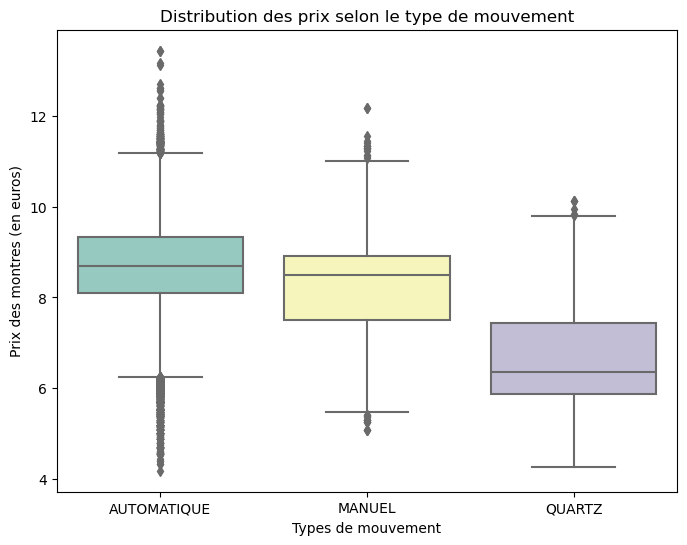

In [132]:
# Création d'un boxplot pour visualiser la distribution des prix par localisation
plt.figure(figsize=(8, 6))
sns.boxplot(x='mouvement', y='prix_log', data=df, palette="Set3")
plt.title('Distribution des prix selon le type de mouvement')
plt.xlabel('Types de mouvement')
plt.ylabel('Prix des montres (en euros)')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



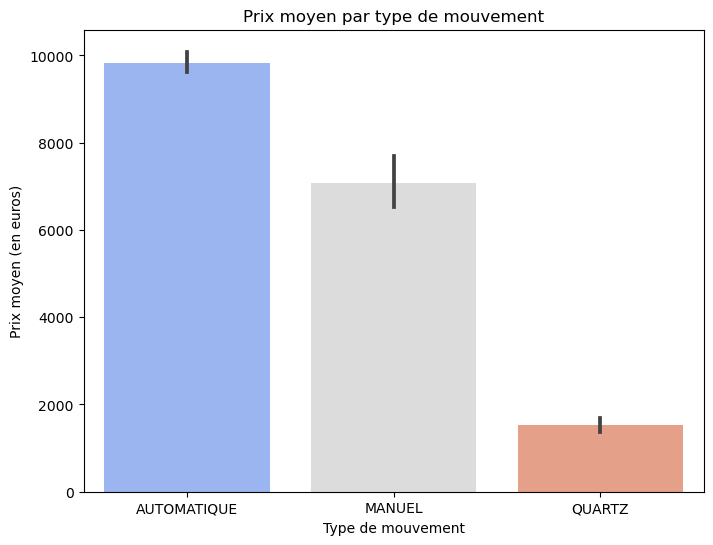

In [124]:
plt.figure(figsize=(8, 6))
sns.barplot(x='mouvement', y='prix', data=df, estimator='mean', palette="coolwarm")
plt.title('Prix moyen par type de mouvement')
plt.xlabel('Type de mouvement')
plt.ylabel('Prix moyen (en euros)')
plt.show()

## Etude Sexe x Prix

In [125]:
stat_sexe = df.groupby('sexe')['prix'].agg(['mean', 'min', 'max', 'std']).reset_index()
stat_sexe.columns = ['sexe', 'prix_moyen', 'prix_min', 'prix_max', 'ecart_type']
stat_sexe['prix_moyen'] = stat_sexe['prix_moyen'].round(2)
stat_sexe['ecart_type'] = stat_sexe['ecart_type'].round(2)

def fig(df):
    fig = go.Figure(data=[go.Table(
        header=dict(values=["Sexe","prix_moyen","prix_min", "prix_max", "ecart_type"],
                    fill_color='paleturquoise',
                    align='center'),
        cells=dict(values=[stat_sexe['sexe'], stat_sexe['prix_moyen'], stat_sexe['prix_min'],
                        stat_sexe['prix_max'], stat_sexe['ecart_type']],
                fill_color='lavender',
                align='left'))
    ])

    fig.update_layout(title="Statistiques par sexe")
    return fig.show()

/var/folders/p6/x2kwnhx179jfhzmzkgdjfsdc0000gn/T/ipykernel_3448/456256914.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [126]:
fig(df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



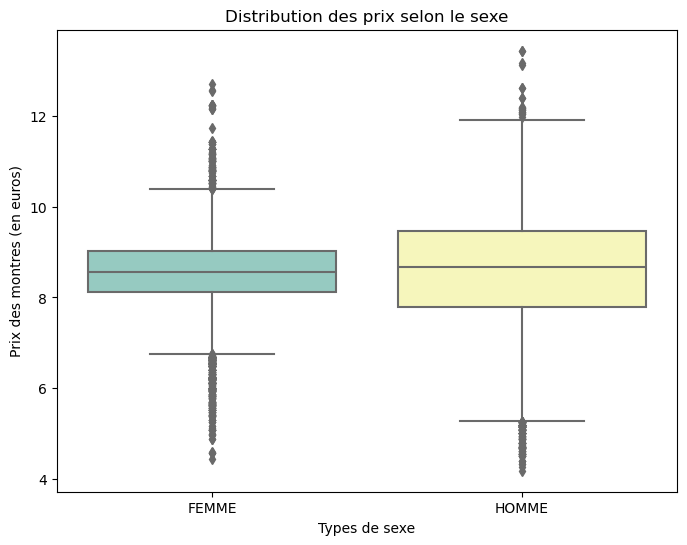

In [133]:
# Création d'un boxplot pour visualiser la distribution des prix par localisation
plt.figure(figsize=(8, 6))
sns.boxplot(x='sexe', y='prix_log', data=df, palette="Set3")
plt.title('Distribution des prix selon le sexe')
plt.xlabel('Types de sexe')
plt.ylabel('Prix des montres (en euros)')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



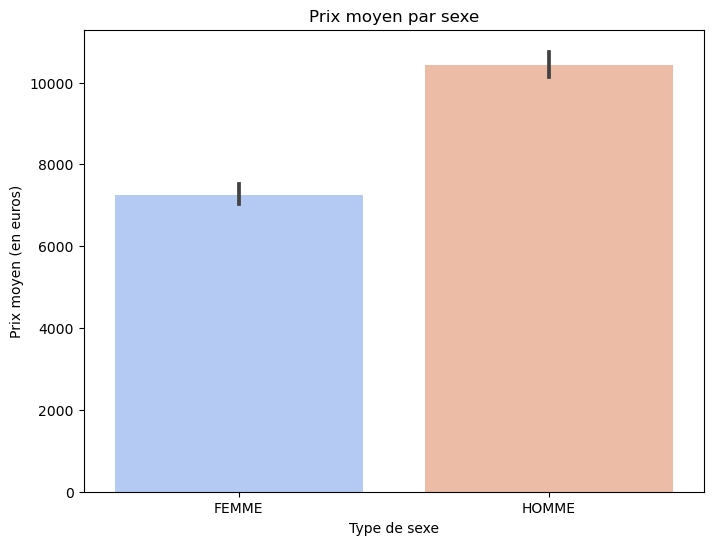

In [128]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sexe', y='prix', data=df, estimator='mean', palette="coolwarm")
plt.title('Prix moyen par sexe')
plt.xlabel('Type de sexe')
plt.ylabel('Prix moyen (en euros)')
plt.show()

## Etude Marque x Prix 

In [129]:
stat_marque = df.groupby('marque')['prix'].agg(['mean', 'min', 'max', 'std']).reset_index()
stat_marque.columns = ['marque', 'prix_moyen', 'prix_min', 'prix_max', 'ecart_type']
stat_marque['prix_moyen'] = stat_marque['prix_moyen'].round(2)
stat_marque['ecart_type'] = stat_marque['ecart_type'].round(2)
stat_marque = stat_marque.sort_values(by='prix_moyen', ascending=False).reset_index(drop=True)

def fig(df):
    fig = go.Figure(data=[go.Table(
        header=dict(values=["Marque","prix_moyen","prix_min", "prix_max", "ecart_type"],
                    fill_color='paleturquoise',
                    align='center'),
        cells=dict(values=[stat_marque['marque'], stat_marque['prix_moyen'], stat_marque['prix_min'],
                        stat_marque['prix_max'], stat_marque['ecart_type']],
                fill_color='lavender',
                align='left'))
    ])

    fig.update_layout(title="Statistiques par marque")
    return fig.show()

/var/folders/p6/x2kwnhx179jfhzmzkgdjfsdc0000gn/T/ipykernel_3448/802078048.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [130]:
fig(df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



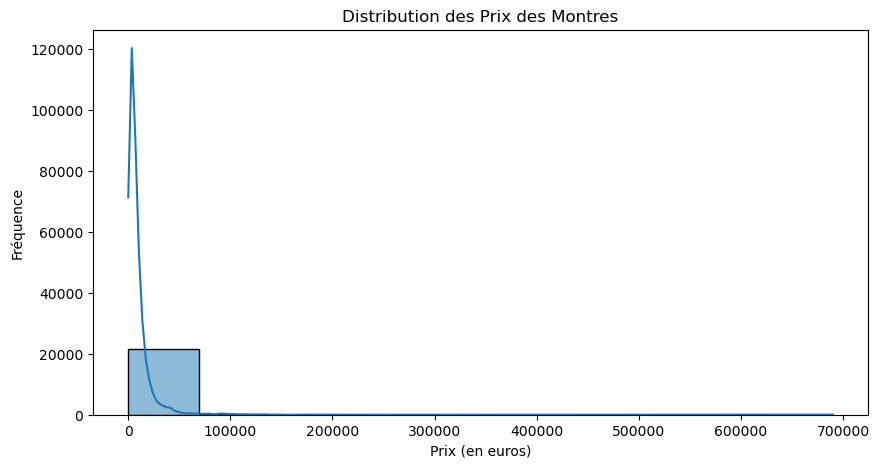

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



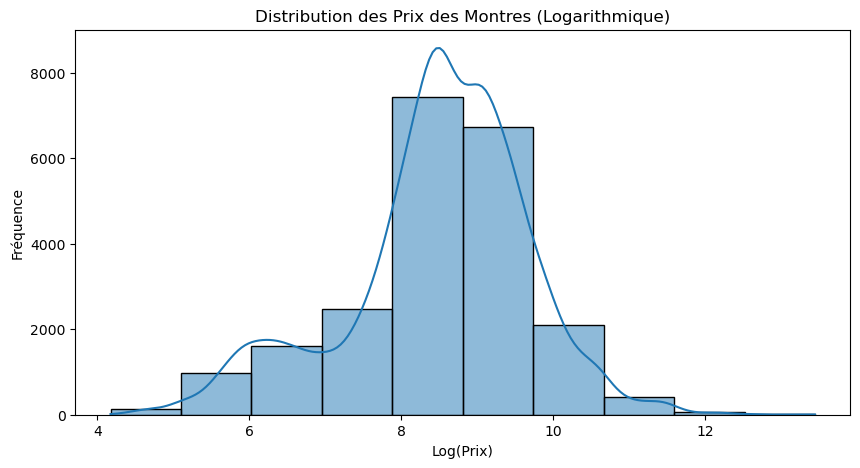

In [131]:
# Visualisation de la distribution des prix
plt.figure(figsize=(10, 5))
sns.histplot(df['prix'], bins=10, kde=True)
plt.title('Distribution des Prix des Montres')
plt.xlabel('Prix (en euros)')
plt.ylabel('Fréquence')
plt.show()


# Visualisation de la distribution après transformation
plt.figure(figsize=(10, 5))
sns.histplot(df['prix_log'], bins=10, kde=True)
plt.title('Distribution des Prix des Montres (Logarithmique)')
plt.xlabel('Log(Prix)')
plt.ylabel('Fréquence')
plt.show()